In [59]:
import pandas as pd

cycling = pd.read_csv("../datasets/bike_rides.csv", index_col=0,
                      parse_dates=True)
cycling.index.name = ""
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]
data

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000
...,...,...,...,...,...
2020-09-13 14:55:57,130.0,0.0,1.054,0.0234,0.000000
2020-09-13 14:55:58,130.0,0.0,0.829,0.0258,0.000000
2020-09-13 14:55:59,129.0,0.0,0.616,-0.1686,0.000000


In [10]:
import numpy as np

def clip_acceleration(x):
    if x < 0:
        return 0
    else:
        return x
    
data['acceleration'] = data['acceleration'].apply(clip_acceleration)
data['speed3'] = data['speed'] ** 3
data['speed*sine'] = data['speed'] * np.arctan(data['slope'])
data['speed*acc'] = data['speed'] * data['acceleration']

new_data = data[['speed3', 'speed', 'speed*sine', 'speed*acc']]

In [11]:
new_data.describe()

,speed3,speed,speed*sine,speed*acc
count,38254.000000,38254.000000,38254.000000,38254.000000
mean,716.713830,8.203325,-0.002675,0.571451
std,631.602968,2.603563,0.249764,1.082863
min,0.000000,0.000000,-1.805994,0.000000
25%,284.760443,6.579000,0.000000,0.000000
50%,571.167214,8.297000,0.000000,0.045422
75%,962.674280,9.874000,0.076832,0.694669
max,6439.008413,18.604000,2.070379,21.015078


In [18]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline


ridge_pipe = Pipeline([('scaler', StandardScaler()), 
    ('ridge', RidgeCV())])

ridge_pipe.get_params()
# print(ridge_pipe['ridge'])

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [53]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=4, random_state=0)

cv_results = cross_validate(ridge_pipe, new_data, target, cv=cv,
                    scoring='neg_mean_absolute_error', 
                     return_estimator=True,
                     return_train_score=True)

pd_results = pd.DataFrame(cv_results)
pd_results.describe()

,fit_time,score_time,test_score,train_score
count,4.000000,4.000000,4.000000,4.000000
mean,0.029537,0.003546,-72.439190,-72.500783
std,0.006213,0.001379,0.880370,0.109964
min,0.022255,0.002028,-73.293655,-72.634673
25%,0.025535,0.002932,-73.027055,-72.560801
50%,0.030089,0.003396,-72.582194,-72.494760
75%,0.034091,0.004010,-71.994330,-72.434742
max,0.035718,0.005363,-71.298717,-72.378937


In [19]:
for estimator in cv_results['estimator']:
    print(estimator['ridge'].coef_)

[ 5.09024453 33.12120631 79.69567    10.82131302]
[ 5.29219947 32.99992031 80.70875903 11.31978258]
[ 5.83913196 32.35437425 80.587116   11.20077473]
[ 5.74097451 32.5607649  80.2789486  11.24251846]


# Part 2

In [21]:
from sklearn.ensemble import HistGradientBoostingRegressor

grad_boost = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True)

In [55]:
cv = ShuffleSplit(n_splits=4, random_state=0)

cv_boost_results = cross_validate(grad_boost, data, target, cv=cv,
                    scoring='neg_mean_absolute_error', 
                     return_estimator=True,
                     return_train_score=True)

pd_boost_results = pd.DataFrame(cv_boost_results)
pd_boost_results.describe()

,fit_time,score_time,test_score,train_score
count,4.000000,4.000000,4.000000,4.000000
mean,1.362558,0.026572,-42.907700,-38.389094
std,0.298448,0.005888,0.514529,1.247287
min,1.032583,0.020548,-43.555296,-39.331192
25%,1.246486,0.023050,-43.189363,-38.991980
50%,1.330111,0.025727,-42.839910,-38.836661
75%,1.446183,0.029248,-42.558247,-38.233775
max,1.757427,0.034285,-42.395686,-36.551861


In [34]:
set(data.index.date)

{datetime.date(2020, 8, 18),
 datetime.date(2020, 8, 20),
 datetime.date(2020, 8, 26),
 datetime.date(2020, 9, 13)}

In [42]:
group = pd.factorize(data.index.date)[0]
len(group)

38254

In [45]:
data['group'] = group
data.head(5)

,heart-rate,cadence,speed,acceleration,slope,speed3,speed*sine,speed*acc,group
,,,,,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870,80.901828,-0.146430,0.380600,0
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571,81.520685,-0.145510,0.365091,0
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223,85.707790,-0.146425,0.103171,0
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908,87.824421,-0.146224,0.007112,0
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000,87.587538,0.000000,0.508050,0


In [52]:
from sklearn.model_selection import LeaveOneGroupOut

cv = LeaveOneGroupOut()

cv_group_results = cross_validate(grad_boost, data, target, cv=cv,
                    scoring='neg_mean_absolute_error', groups=group,
                     return_estimator=True,
                     return_train_score=True)

pd_group_results = pd.DataFrame(cv_group_results)
pd_group_results.describe()

,fit_time,score_time,test_score,train_score
count,4.000000,4.000000,4.000000,4.000000
mean,1.282768,0.056502,-51.366773,-37.950579
std,0.439974,0.018851,3.390986,2.854350
min,0.714914,0.033795,-55.060831,-42.174996
25%,1.062966,0.045780,-53.838358,-38.416360
50%,1.346402,0.057499,-50.997444,-36.790663
75%,1.566203,0.068221,-48.525859,-36.324882
max,1.723354,0.077218,-48.411371,-36.045995


In [61]:
cv = LeaveOneGroupOut()

cv_ridge_group_results = cross_validate(ridge_pipe, new_data, target, cv=cv,
                    scoring='neg_mean_absolute_error', groups=group,
                     return_estimator=True,
                     return_train_score=True)

pd_ridge_group_results = pd.DataFrame(cv_ridge_group_results)
pd_ridge_group_results.describe()

,fit_time,score_time,test_score,train_score
count,4.000000,4.000000,4.000000,4.000000
mean,0.018497,0.002436,-73.051905,-72.274643
std,0.005645,0.000778,6.693533,2.603817
min,0.013539,0.001861,-81.371487,-75.350182
25%,0.013816,0.001891,-75.342370,-73.173169
50%,0.017848,0.002176,-72.917464,-72.383742
75%,0.022529,0.002720,-70.626998,-71.485217
max,0.024752,0.003532,-65.001205,-68.980905


# Part 3

In [60]:
cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=group))[0]

data_linear_model_train = new_data.iloc[train_indices]
data_linear_model_test = new_data.iloc[test_indices]

data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]

target_train = target.iloc[train_indices]
target_test = target.iloc[test_indices]

In [63]:
ridge_pipe.fit(data_linear_model_train, target_train)

ridge_predictions = ridge_pipe.predict(data_linear_model_test)

In [64]:
grad_boost.fit(data_train, target_train)

boost_predictions = grad_boost.predict(data_test)

Text(0.5, 1.0, 'Relation between true power and predicted power for linear model')

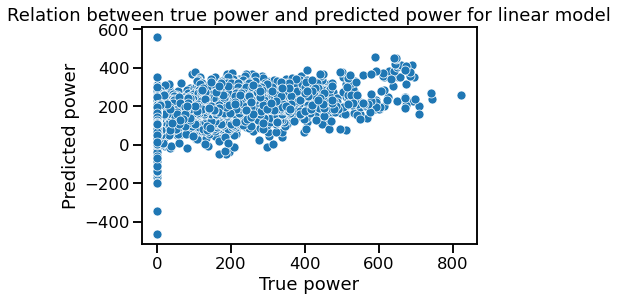

In [68]:
import matplotlib.pyplot as plt
import seaborn

seaborn.scatterplot(x=target_test, y=ridge_predictions)
plt.xlabel("True power")
plt.ylabel("Predicted power")
plt.title("Relation between true power and predicted power for linear model")

Text(0.5, 1.0, 'Relation between true power and predicted power for boosting model')

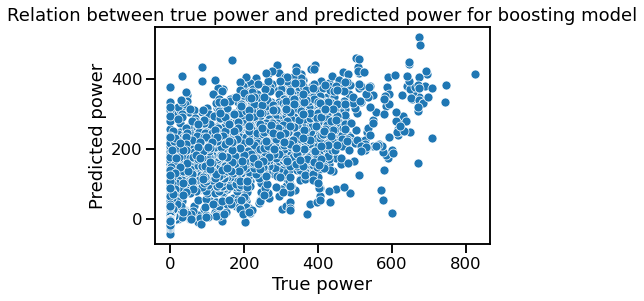

In [69]:
seaborn.scatterplot(x=target_test, y=boost_predictions)
plt.xlabel("True power")
plt.ylabel("Predicted power")
plt.title("Relation between true power and predicted power for boosting model")

In [70]:
time_slice = slice("2020-08-18 17:00:00", "2020-08-18 17:05:00")

data_test_linear_model_subset = data_linear_model_test[time_slice]
data_test_subset = data_test[time_slice]
target_test_subset = target_test[time_slice]

In [71]:
few_ridge_preds = ridge_pipe.predict(data_test_linear_model_subset)
few_boost_preds = grad_boost.predict(data_test_subset )

Text(0.5, 1.0, 'Relation between true power and predicted power for linear model')

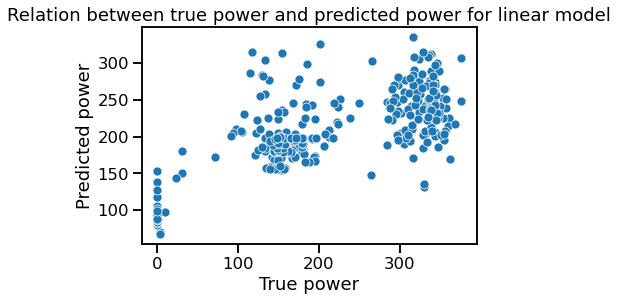

In [72]:
import matplotlib.pyplot as plt
import seaborn

seaborn.scatterplot(x=target_test_subset, y=few_ridge_preds)
plt.xlabel("True power")
plt.ylabel("Predicted power")
plt.title("Relation between true power and predicted power for linear model")

Text(0.5, 1.0, 'Relation between true power and predicted power for boosting model')

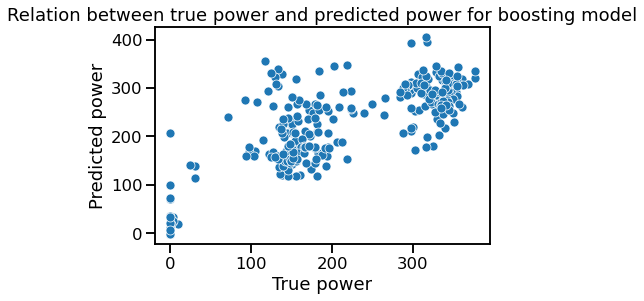

In [73]:
seaborn.scatterplot(x=target_test_subset, y=few_boost_preds)
plt.xlabel("True power")
plt.ylabel("Predicted power")
plt.title("Relation between true power and predicted power for boosting model")